In [1]:
#!pip install -r requirements.txt
import PyFed.money_stock as ms
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
H8 = ms.FRB_H8.H8() # initialize the data vendor and download data

In [3]:
df = H8.book # extract the dataframe

In [4]:
H8.info() # print the structure of the dataset

All Commercial Banks, NSA
B1001NCBD: Bank credit
B1002NCBD: 	Securities in bank credit
B1003NCBD: 		Treasury and agency securities
B1301NCBD: 			Agency MBS
B1302NCBD: 			Treasuries
B1011NCBD: 		Other securities
B1303NCBD: 			Non-Agency MBS
B1304NCBD: 			Securities other than MBS or Treasuries
B1020NCBD: 	Loans and leases in bank credit
B1023NCBD: 		Commercial and industrial loans
B1026NCBD: 		Real estate loans
B1221NCBD: 			Residential real estate loans
B1027NCBD: 				Revolving home equity loans
B1220NCBD: 				Closed-end residential loans
B3219NCBD: 			Commercial real estate loans
B1215NCBD: 				Construction and land development loans
B1216NCBD: 				Secured by farmland
B1217NCBD: 				Secured by multifamily properties
B1218NCBD: 				Secured by nonfarm nonresidential properties
B1029NCBD: 		Consumer loans
B1247NCBD: 			Credit cards and other revolving plans
B3248NCBD: 			Other consumer loans
B1243NCBD: 				Automobile loans
B1245NCBD: 				All other consumer loans
B3305NCBD: 		All other lo

In [16]:
def two_column_line_plot(df, col1, col2, 
                         start_date_1='2008', start_date_2='2008', 
                         sharey = False, mode='level'):
    
    
    if mode == 'level':
        fig, axes = plt.subplots(1,2, figsize=(15,6), sharey = sharey)
        df[col1].unstack()[start_date_1:].apply(lambda x: x/1000).plot(color = ['r','b','gray'], ax=axes[0])
        df[col2].unstack()[start_date_2:].apply(lambda x: x/1000).plot(color = ['r','b','gray'], ax=axes[1])
        axes[0].set_ylabel('Billion Dollars')
        axes[0].set_title(col1)
        axes[1].set_ylabel('Billion Dollars')
        axes[1].set_title(col2)
    elif mode == 'pct_yoy':
        fig, axes = plt.subplots(1,2, figsize=(15,6), sharey = sharey)
        df[col1].unstack()[start_date_1:].pct_change(52).apply(lambda x: x*100).plot(
            color = ['r','b','gray'], ax=axes[0])
        df[col2].unstack()[start_date_2:].pct_change(52).apply(lambda x: x*100).plot(
            color = ['r','b','gray'], ax=axes[1])
        axes[0].set_ylabel('%')
        axes[0].set_title(col1)
        axes[1].set_ylabel('%')
        axes[1].set_title(col2)
    else:
        raise KeyError('Must be one of [level,pct_yoy].')

    for ax in axes:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.spines['left'].set_position(('outward', 10))
        ax.spines['bottom'].set_position(('outward', 10))

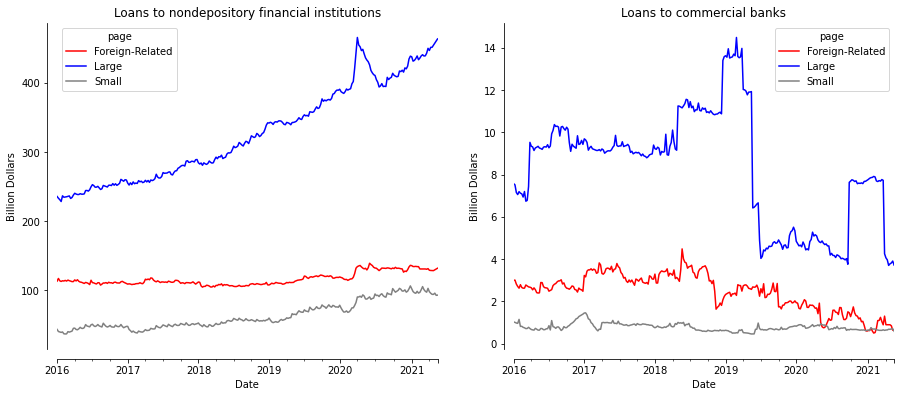

In [6]:
two_column_line_plot(df,'Loans to nondepository financial institutions', 'Loans to commercial banks', 
                     start_date_1 = '2016', start_date_2 = '2016')

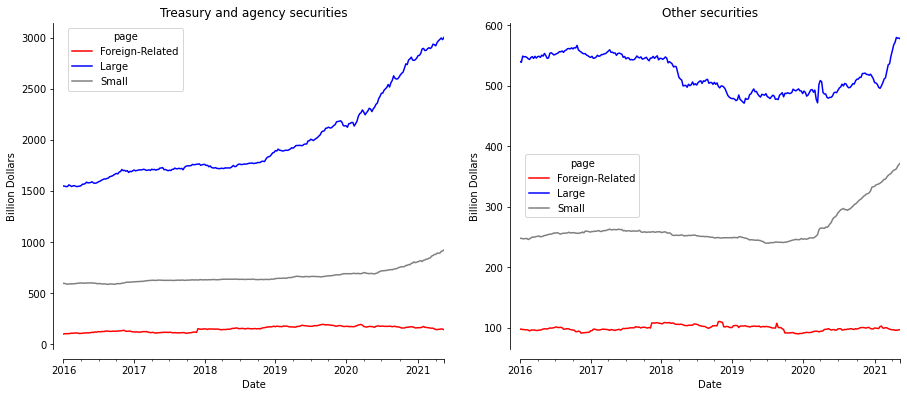

In [7]:
two_column_line_plot(df,'Treasury and agency securities', 'Other securities', start_date_1 = '2016', start_date_2 = '2016')

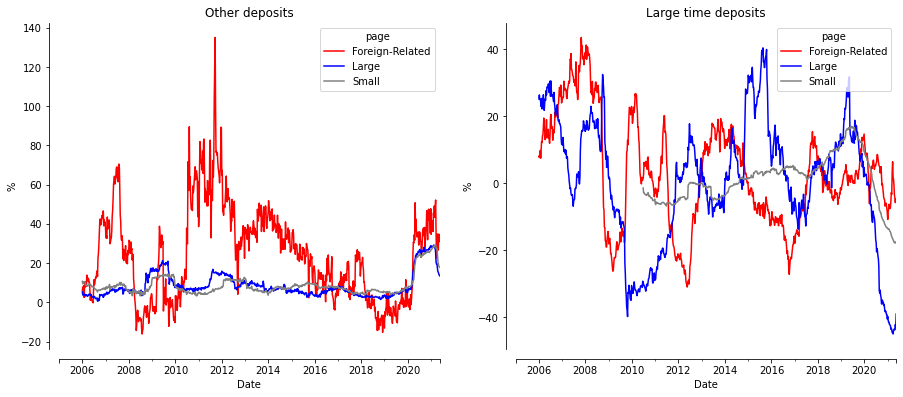

In [17]:
two_column_line_plot(df,'Other deposits', 'Large time deposits', 
                     start_date_1 = '2005', start_date_2 = '2005', mode='pct_yoy')

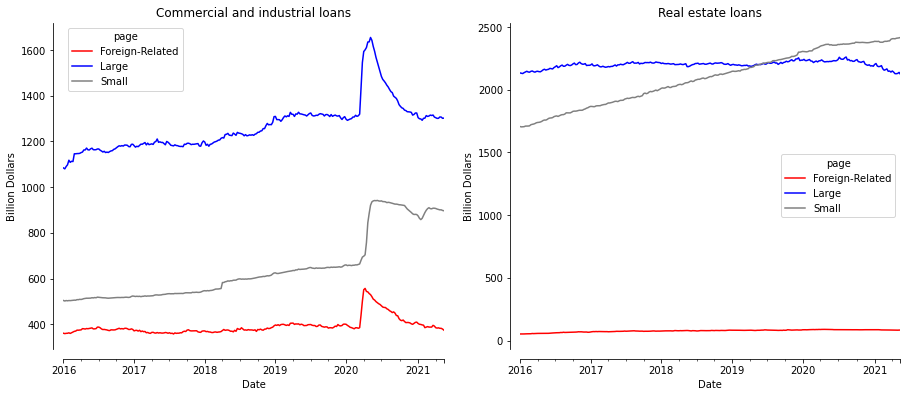

In [9]:
two_column_line_plot(df,'Commercial and industrial loans', 'Real estate loans', start_date_1 = '2016', start_date_2 = '2016')

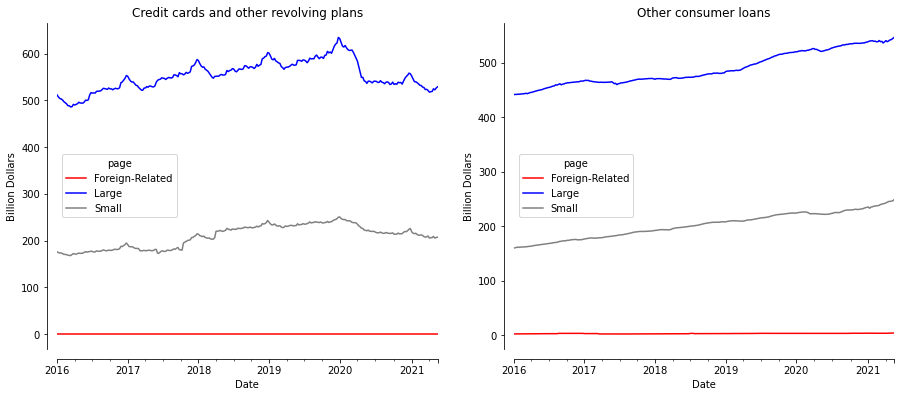

In [10]:
two_column_line_plot(df,'Credit cards and other revolving plans', 'Other consumer loans', start_date_1 = '2016', start_date_2 = '2016')